**Importando Librerías**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
#warnings.filterwarnings('ignore')


**Definiendo variables globales**

In [5]:
global df_ventas
global df_ventas_limpio
colores = ['#6a0573', '#ab0476', '#ff5c8d', '#ff8484', '#ffc75f']

**Obtención de Datos**





In [6]:
def obtencion_datos():
    global df_ventas_limpio
    global df_ventas

    df_ventas = pd.read_csv("reporte_ventas.csv")
# formatear_columnas_fechas
    df_ventas['fecha_pedido'] = pd.to_datetime(df_ventas['fecha_pedido'], format='%Y-%m-%d')
    df_ventas['fecha_envio'] = pd.to_datetime(df_ventas['fecha_envio'], format='%Y-%m-%d')
  
# eliminar_repetidos
    df_ventas_limpio = df_ventas.drop_duplicates()


# eliminar registros de prueba:
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['nombre_cliente'] != 'prueba']

# Eliminar nulos
    df_ventas_limpio = df_ventas_limpio.dropna(subset=['nombre_cliente'])

# Eliminar ganancias menores o igual a 0
    df_ventas_limpio = df_ventas_limpio[df_ventas_limpio['total_ganancia'] > 0]
    
# Resetear índice    
    df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)

obtencion_datos()  


print('-------Datos-----')
df_ventas_limpio.info()
print('Duplicados:')
print(df_ventas_limpio.duplicated().sum())
print('------------')
print('Registros de prueba:')
print((df_ventas_limpio['nombre_cliente'] == 'prueba').sum())
print('------------')
print('Registros con ganancia<=0:')
print((df_ventas_limpio['total_ganancia'] <= 0).sum())



-------Datos-----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_pedido           7210 non-null   datetime64[ns]
 1   fecha_envio            7210 non-null   datetime64[ns]
 2   modo_envio             7210 non-null   object        
 3   nombre_cliente         7210 non-null   object        
 4   segmento_cliente       7210 non-null   object        
 5   ciudad                 7210 non-null   object        
 6   estado                 7210 non-null   object        
 7   region                 7210 non-null   object        
 8   departamento_producto  7210 non-null   object        
 9   tipo_producto          7210 non-null   object        
 10  precio_base            7210 non-null   float64       
 11  precio_unit_sin_desc   7210 non-null   float64       
 12  descuento              7210 non-null   float

**1. ¿Cuáles son las ventas totales por año? ¿Y cuanto han aumentado las ventas desde el año 2019?**

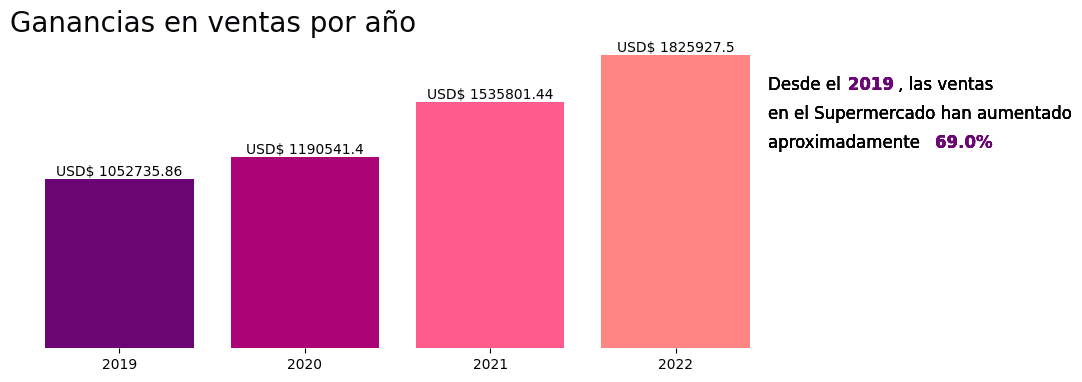

In [9]:
def pregunta_1():
    global df_ventas
    global df_ventas_año
    global colores
    
    # Crear una copia de df_ventas_limpio con las columnas necesarias
    df_ventas_año=df_ventas_limpio[['fecha_pedido', 'total_venta']].copy()

    # Crea una nueva columna llamada 'año' con el año de 'fecha_pedido'
    df_ventas_año['año'] = df_ventas_año['fecha_pedido'].dt.year

    # Elimina la columna 'fecha_pedido'
    df_ventas_año = df_ventas_año.drop('fecha_pedido', axis=1)

    df_ventas_año_agrupado = df_ventas_año.groupby('año').aggregate({'total_venta': 'sum'}).reset_index()

    # Calcular el porcentaje de ventas entre 2022 y 2021
    ventas_2019 = df_ventas_año.loc[2019, 'total_venta']
    ventas_2022 = df_ventas_año.loc[2022, 'total_venta']
    porcentaje_ventas = (((ventas_2019 - ventas_2022) / ventas_2019) * 100).round()
      
    # Visualización
    fig, ax = plt.subplots(figsize=(10,4))

    # Colocar los valores sobre cada barra
    ax.bar(df_ventas_año_agrupado["año"], df_ventas_año_agrupado["total_venta"], color=colores, width=0.8)
    plt.xticks([2019, 2020, 2021, 2022])
    plt.box(False)
    plt.gca().yaxis.set_visible(False)
    plt.title('Ganancias en ventas por año', loc='left', color='#06060a', fontsize=20)
    
    for bar in ax.patches:
      valor = bar.get_height()
      qtd = f"USD$ {valor}"
      ax.text(bar.get_x() + bar.get_width() / 2.0, valor, qtd, ha='center', va='bottom')
      
      ax.text(2022.5,16.1e5,"Desde el", fontsize=12)
      ax.text(2022.9,16.1e5," 2019", fontsize=12,color='#6a0573', weight="bold")
      ax.text(2023.20,16.1e5,", las ventas", fontsize=12)
      ax.text(2022.5,14.3e5,"en el Supermercado han aumentado", fontsize=12)
      ax.text(2022.5,12.5e5,"aproximadamente", fontsize=12)
      ax.text(2023.4,12.5e5, f'{porcentaje_ventas}%', color='#6a0573', fontsize=12, weight="bold")
    
    # Establecer el formato de los ticks del eje x como enteros
    ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))   
     


pregunta_1()

**2. ¿Cuáles son los 7 productos que más ganancias mostraron durante todo el período?**

                       total_ganancia
tipo_producto                        
Bolsas de basura             53328.46
Detergente para ropas        55766.39
Jeans                        55982.95
Smartphones                  64705.58
Cámaras digitales            80192.63
Laptops                      91148.67
Lámparas LED                111453.41


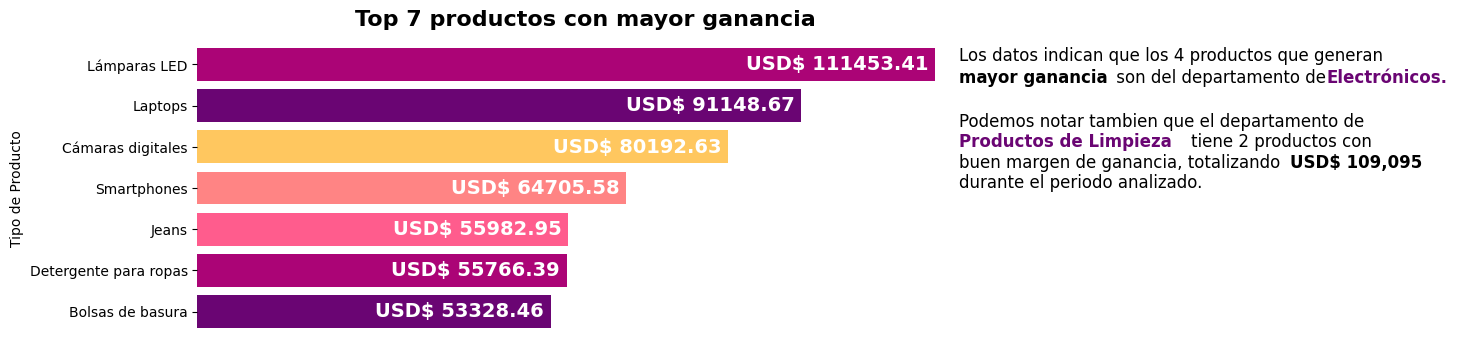

In [11]:
def pregunta_2():
    global df_ventas_limpio
    global df_top_ganancias

    # Crear una copia de df_ventas_limpio con solo las columnas 'tipo_producto' y 'total_ganancia'
    df_top_ganancias = df_ventas_limpio[['tipo_producto', 'total_ganancia']].copy()

    # Agrupar por 'tipo_producto', sumarizar 'total_ganancia' y ordenar los resultados
    df_top_ganancias = df_top_ganancias.groupby('tipo_producto').aggregate({'total_ganancia': 'sum'}).sort_values('total_ganancia', ascending=False)

    # Seleccionar los primeros 7 registros
    df_top_ganancias = df_top_ganancias.head(7).sort_values('total_ganancia', ascending=True)

    print(df_top_ganancias)

# Crear la figura y el eje
    fig, ax = plt.subplots(figsize=(10, 4))

# Crear el gráfico de barras horizontal
    ax.barh(df_top_ganancias.index, df_top_ganancias['total_ganancia'], color=colores, align='center')

# Colocar los valores en cada barra
    
    for barra in ax.patches:
      width = barra.get_width()
      ax.text(width-1000, barra.get_y() + barra.get_height() / 2, f'USD$ {width:.2f}', ha='right', va='center', fontsize=14, color='white', weight='bold')
    ax.set_title('Top 7 productos con mayor ganancia', fontsize=16, weight ='bold')
    ax.set_ylabel('Tipo de Producto')
    ax.set_xlabel('Total de Ganancias')

    plt.box(False)
    plt.gca().xaxis.set_visible(False)

    ax.text(11.5e4,6.1,"Los datos indican que los 4 productos que generan", fontsize=12)
    ax.text(11.5e4,5.56,"mayor ganancia", fontsize=12, weight ='bold')
    ax.text(13.8e4,5.56," son del departamento de", fontsize =12)
    ax.text(17.05e4,5.56,"Electrónicos.", fontsize =12, color='#6a0573', weight='bold')
    ax.text(11.5e4,4.5,"Podemos notar tambien que el departamento de", fontsize =12)
    ax.text(11.5e4,4,"Productos de Limpieza", fontsize =12, color='#6a0573', weight ='bold')
    ax.text(15e4,4,"tiene 2 productos con", fontsize =12)
    ax.text(11.5e4,3.5,"buen margen de ganancia, totalizando", fontsize =12)
    ax.text(16.5e4,3.5,"USD$ 109,095 ", fontsize=12, weight='bold')
    ax.text(11.5e4,3,"durante el periodo analizado.", fontsize =12)  

# Mostrar el gráfico
    plt.show()

pregunta_2()

**3. ¿Cuales son las ventas totales que generan las regiones en cada uno de los años del período?**

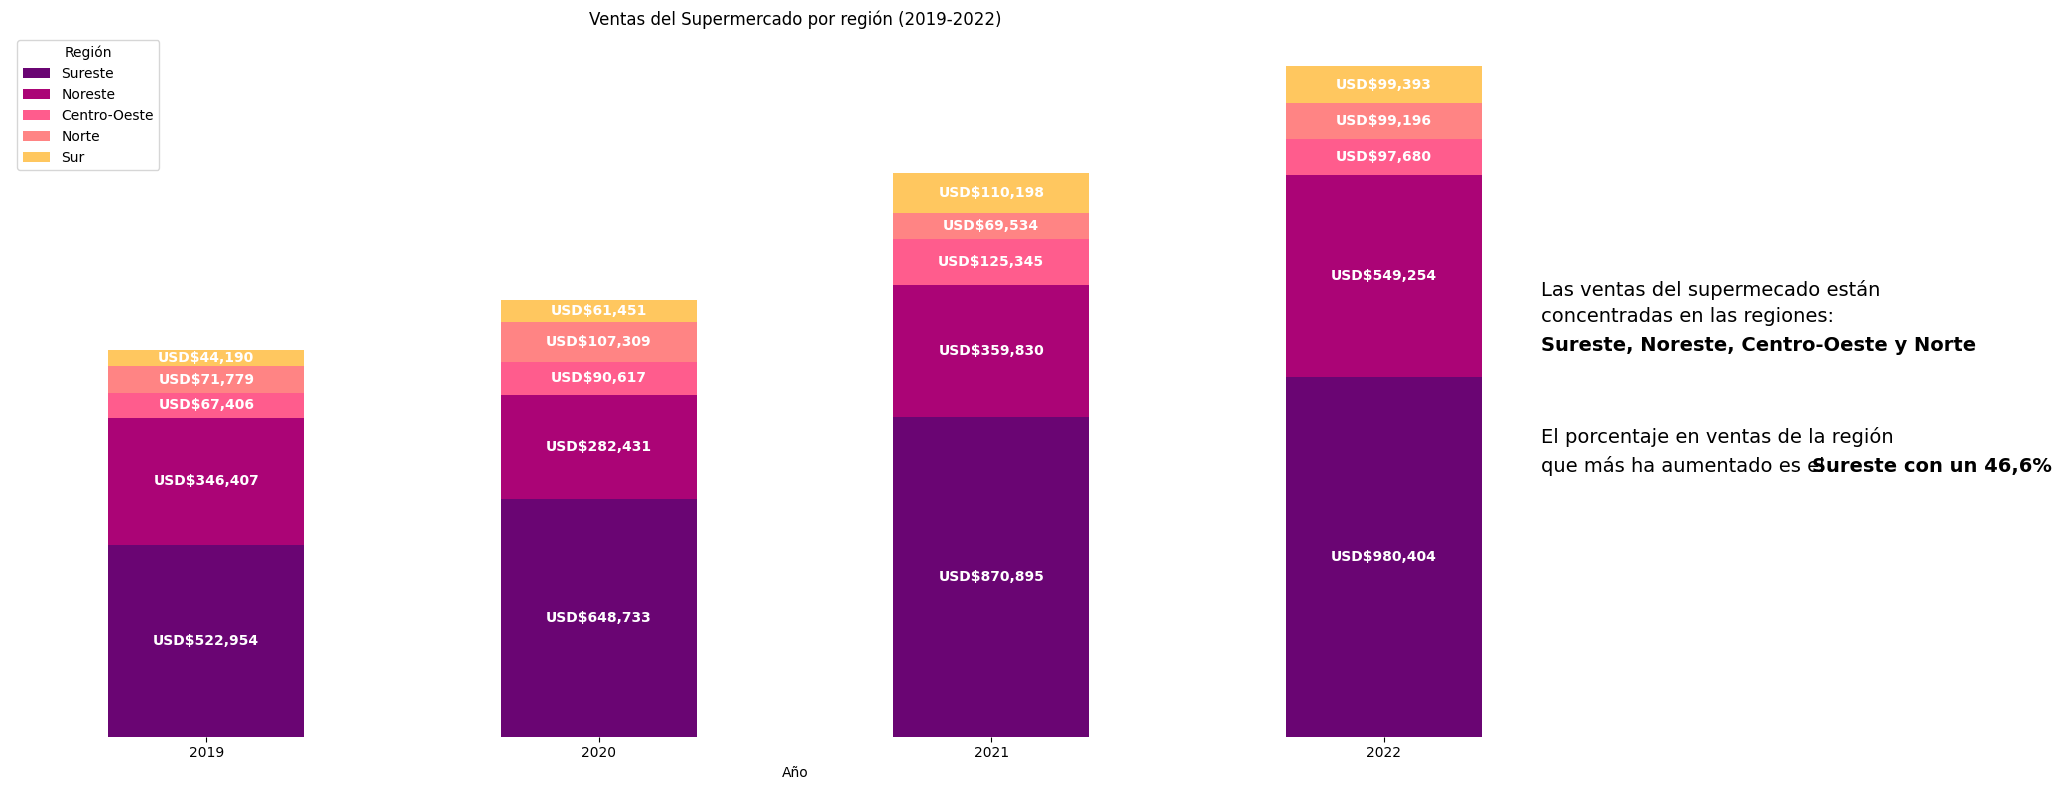

In [7]:
def pregunta_3():
    # Definir las variables globales según las instrucciones
    global df_ventas, df_ventas_limpio

    # 1. Preparación de los datos
    # Crear una copia de df_ventas_limpio con solo las columnas especificadas
    df_ventas_año_region = df_ventas_limpio[['fecha_pedido', 'region', 'total_venta']].copy()
    # Crear una nueva columna 'año' con solo el año de 'fecha_pedido'
    df_ventas_año_region['año'] = df_ventas_año_region['fecha_pedido'].dt.year
    # Eliminar la columna 'fecha_pedido'
    df_ventas_año_region.drop('fecha_pedido', axis=1, inplace=True)
    # Generar una tabla pivotante
    df_ventas_año_region = pd.crosstab(index=df_ventas_año_region['año'],
                                        columns=df_ventas_año_region['region'],
                                        values=df_ventas_año_region['total_venta'],
                                        aggfunc='sum')

    # Ordenar los valores dentro de cada fila de manera descendente
    df_ventas_año_region = df_ventas_año_region.apply(lambda row: row.sort_values(ascending=False), axis=1)

    # Ordenar las columnas por el total de cada año
    df_ventas_año_region = df_ventas_año_region[df_ventas_año_region.sum(axis=0).sort_values(ascending=False).index]

    # 2. Visualización
    # Crear el gráfico de barras apiladas
    ax = df_ventas_año_region.plot(kind='bar', stacked=True, figsize=(15, 8), color=colores)
    # Añadir etiquetas a cada segmento
    for container in ax.containers:
        # Convertir a texto y añadir el símbolo de $ al principio
        labels = [f"USD${v:,.0f}" for v in container.datavalues]
        ax.bar_label(container, label_type='center', labels=labels ,color='white', fontweight="bold", fontsize=12)
   
    # Rotar las etiquetas del eje x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)  
    
    # Personalizar la gráfica con opciones adicionales según su imaginación
    plt.box(False)
    plt.gca().yaxis.set_visible(False)
    plt.title('Ventas del Supermercado por región (2019-2022)' fontsize=16)
    plt.xlabel('Año', fontsize=14)
    plt.ylabel('Total de ventas',fontsize=14)
    plt.legend(title='Región', fontsize=14)
    plt.tight_layout()

    # Agregar comentario
    ax.text(3.4,1200000,"Las ventas del supermecado están",fontsize=14)
    ax.text(3.4,1130000,"concentradas en las regiones:",fontsize=14)
    ax.text(3.4,1050000,"Sureste, Noreste, Centro-Oeste y Norte       ",fontsize=14,fontweight="bold")
    ax.text(3.4,800000,"El porcentaje en ventas de la región",fontsize=14)
    ax.text(3.4,720000,"que más ha aumentado es el",fontsize=14)
    ax.text(4.09,720000,"Sureste con un 46,6%",fontsize=14,fontweight="bold")

    # Mostrar la gráfica
    plt.show()

# Llamar a la función pregunta_3 para ejecutar el código
pregunta_3()


**4. ¿Cuál es el método de envío más utilizado por los clientes del Supermercado?**

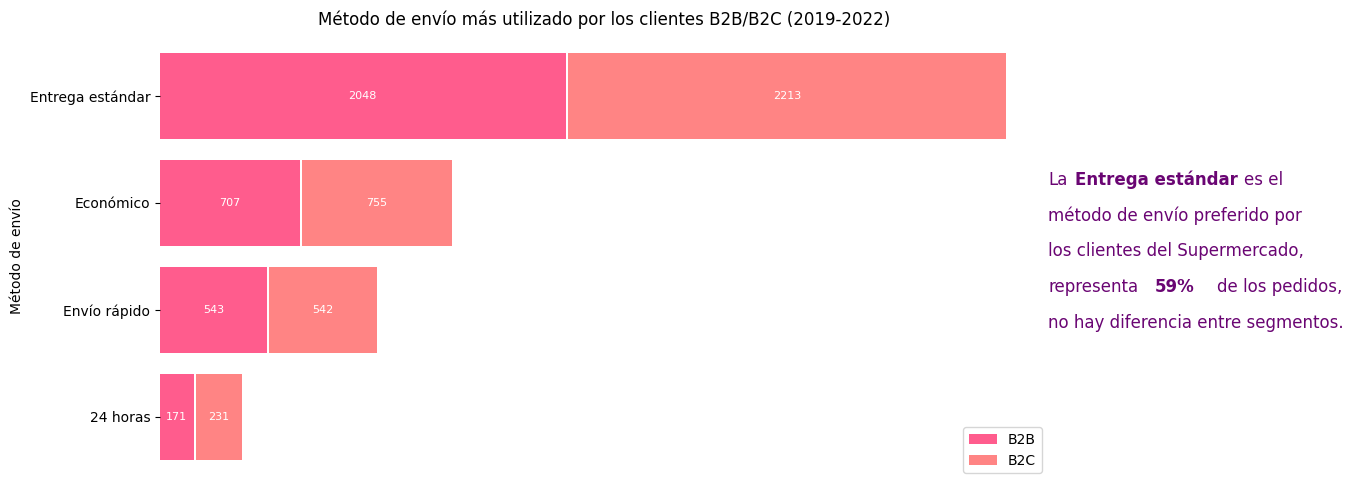

In [13]:
def pregunta_4():
    global df_ventas, df_ventas_limpio
    
    # Preparación de los datos
    df_modo_envio = df_ventas_limpio[['modo_envio', 'segmento_cliente']].copy()
    
    # Generar la tabla cruzada
    df_modo_envio = pd.crosstab(index=df_modo_envio['modo_envio'], columns=df_modo_envio['segmento_cliente']).sort_values("B2B")

    # Calculando el modo de envío preferido de manera global (sumando B2B y B2C)
    df_suma = df_modo_envio.sum(axis=1)
    metodo_envio_max = df_suma.idxmax()
    cantidad_max = df_suma.max()

    # Calcular el porcentaje del método de envío preferido sobre los demás métodos
    total_pedidos = df_suma.sum()
    porcentaje_envio = (cantidad_max / total_pedidos) * 100

    # Visualización
    colores = ['#6a0573', '#ab0476', '#ff5c8d', '#ff8484', '#ffc75f']
    fig, ax = plt.subplots(figsize=(14, 5))
    
    # Crear el gráfico de barras horizontal con colores específicos
    ax.barh(df_modo_envio.index, df_modo_envio['B2B'], color=colores[2], label='B2B')
    ax.barh(df_modo_envio.index, df_modo_envio['B2C'], left=df_modo_envio['B2B'] + 10, color=colores[3], label='B2C')

    # Colocar etiquetas dentro de cada segmento
    for i, container in enumerate(ax.containers):
        labels = [f'{v.get_width()}' if v.get_width() > 0 else '' for v in container]
        ax.bar_label(container, label_type='center', labels=labels, color='white', fontsize=8)

    # Establecer título y etiquetas de ejes
    ax.set_title('Método de envío más utilizado por los clientes B2B/B2C (2019-2022)')
    ax.set_ylabel('Método de envío')
    plt.box(False)
    plt.gca().xaxis.set_visible(False)

    #colocando la leyenda con la información sobre el metodo de envio mas usado
    ax.text(1, 0.66, f'La',transform=ax.transAxes, fontsize=12, color=colores[0])
    ax.text(1.03, 0.66, f'{metodo_envio_max}',transform=ax.transAxes, fontsize=12, weight='bold', color=colores[0])
    ax.text(1.22, 0.66, f'es el',transform=ax.transAxes, fontsize=12, color=colores[0])
    ax.text(1, 0.58, f'método de envío preferido por',transform=ax.transAxes, fontsize=12, color=colores[0])
    ax.text(1, 0.50,f'los clientes del Supermercado,',transform=ax.transAxes, fontsize=12,  color=colores[0])
    ax.text(1, 0.42, f'representa',transform=ax.transAxes, fontsize=12, color=colores[0])
    ax.text(1.12, 0.42, f'{porcentaje_envio:.0f}%',transform=ax.transAxes, fontsize=12, weight='bold', color=colores[0])
    ax.text(1.19, 0.42, f'de los pedidos,',transform=ax.transAxes, fontsize=12, color=colores[0])
    ax.text(1, 0.34, f'no hay diferencia entre segmentos.   ',transform=ax.transAxes, fontsize=12, color=colores[0])

    # Agregar leyenda
    ax.legend()

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

# Llamamos a la función para ejecutarla y visualizar el gráfico
pregunta_4()


**5. ¿Cuáles son las ventas totales por trimestre en el estado de Sao Paulo?**

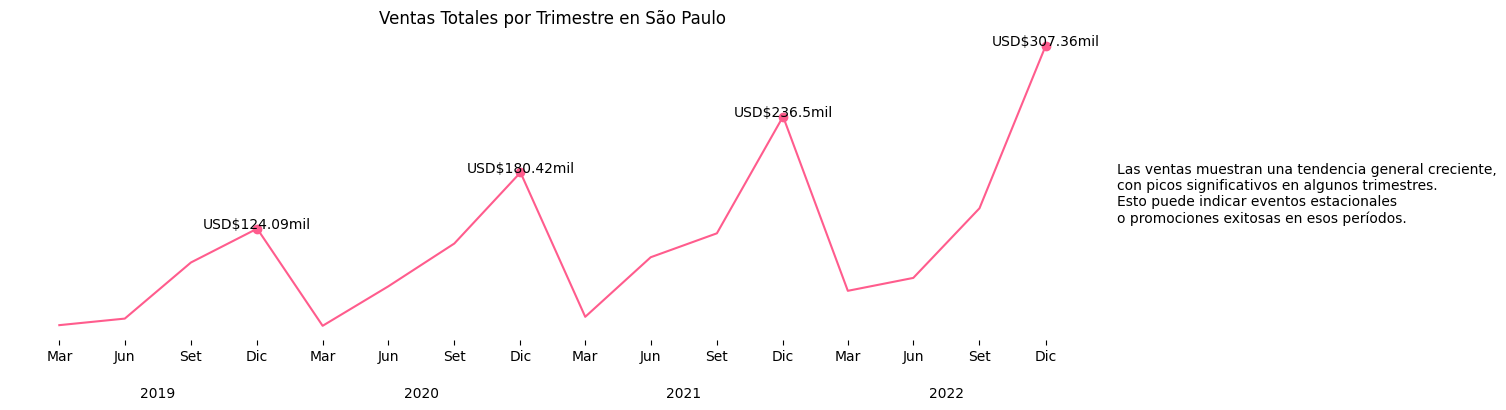

In [14]:
def pregunta_5():
    global df_ventas, df_ventas_limpio
    
    # Preparación de los datos
    # Seleccionamos solo las filas correspondientes al estado de São Paulo
    df_ventas_sp = df_ventas_limpio[df_ventas_limpio['estado'] == 'São Paulo'].copy()
    df_ventas_sp['fecha_pedido'] = pd.to_datetime(df_ventas_sp['fecha_pedido'])
    df_ventas_sp.set_index('fecha_pedido', inplace=True)
    
    # Solo sumamos la columna 'total_venta'
    df_ventas_trimestrales = df_ventas_sp[['total_venta']].resample('Q').sum()
    
    # Convertimos 'total_venta' a escala de miles y redondeamos
    df_ventas_trimestrales['total_venta'] = (df_ventas_trimestrales['total_venta'] / 1000).round(2)
    
    # Reseteamos el índice para usarlo en la visualización
    df_ventas_trimestrales.reset_index(inplace=True)
    
    # Visualización
    fig, ax = plt.subplots(figsize=(14,4))
    
    # Configuramos los puntos para marcar en el gráfico (solo los puntos del 4to trimestre)
    puntos_a_marcar = [True if (i+1) % 4 == 0 else False for i in range(len(df_ventas_trimestrales))]

    # Dibujamos el gráfico de líneas con el color deseado
    ax.plot(df_ventas_trimestrales['fecha_pedido'], df_ventas_trimestrales['total_venta'],
            marker="o", markevery=puntos_a_marcar, color="#ff5c8d")

    # Establecemos etiquetas personalizadas para el eje X
    x_labels = ["Mar", "Jun", "Set", "Dic"] * (len(df_ventas_trimestrales) // 4)
    ax.set_xticks(df_ventas_trimestrales['fecha_pedido'])
    ax.set_xticklabels(x_labels, ha="center")

    # Añadir las etiquetas de los años 
    for i in range(1, len(df_ventas_trimestrales) - 2, 4):
        punto_medio = df_ventas_trimestrales['fecha_pedido'][i:i+2].mean()
        año = punto_medio.year
        ax.text(punto_medio, ax.get_ylim()[0] - (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.15,
                str(año), ha='center', va='top', fontsize=10, color='black')

    #quitando la linea del borde del gráfico
    ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)

    #quitando los valores del eje Y
    ax.set_yticklabels([])
    ax.tick_params(axis='y', which='both', left=False)

    # Colocamos las etiquetas de valor solo en los puntos del 4to trimestre
    for i in range(3, len(df_ventas_trimestrales), 4):
        ax.text(df_ventas_trimestrales['fecha_pedido'][i], df_ventas_trimestrales['total_venta'][i] + 0.02,
                f"USD${df_ventas_trimestrales['total_venta'][i]}mil", ha='center')

    # Añadir análisis a la derecha del gráfico
    analisis = "\nLas ventas muestran una tendencia general creciente,\ncon picos significativos en algunos trimestres.\nEsto puede indicar eventos estacionales\no promociones exitosas en esos períodos."
    ax.text(1.02, 0.5, analisis, transform=ax.transAxes, verticalalignment='center', fontsize=10)

    # Configuraciones adicionales
    ax.set_title("Ventas Totales por Trimestre en São Paulo")
   

    # Mostramos el gráfico
    plt.show()

# Llamamos a la función , quizas haya que declarar df ventas trimestrales despues de llamar a la función
pregunta_5()

**6. Calculando el margen de beneficio por producto y encontrando los 10 productos con mayor margen**

- ¿Cuáles son los productos con el mayor margen de beneficio?
- ¿Cómo ha evolucionado la rentabilidad de los productos más populares a lo largo del tiempo?


Top 10 Productos con Mayor Margen de Beneficio:
tipo_producto
Lámparas LED             111453.41
Laptops                   91148.67
Cámaras digitales         80192.63
Smartphones               64705.58
Jeans                     55982.95
Detergente para ropas     55766.39
Bolsas de basura          53328.46
Papel higiénico           43546.05
Ambientador en spray      40976.16
Vestidos                  29784.63
Name: margen_beneficio, dtype: float64


<Figure size 1200x600 with 0 Axes>

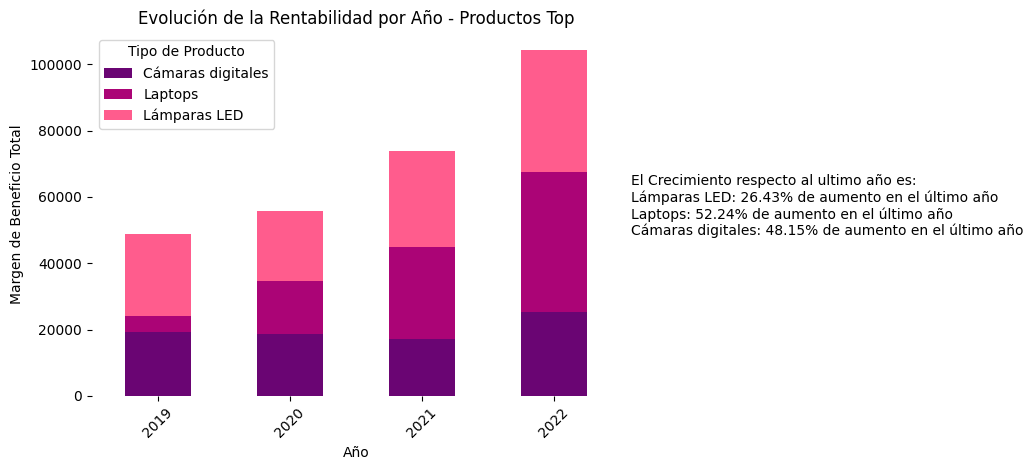

In [15]:
# Resetear índice y calcular margen de beneficio
def resetear_indice_y_calcular_beneficio():
    global df_ventas_limpio
    df_ventas_limpio = df_ventas_limpio.reset_index(drop=True)
    df_ventas_limpio['margen_beneficio'] = (df_ventas_limpio['precio_unit_venta'] - df_ventas_limpio['precio_base']) * df_ventas_limpio['cantidad_pedido']

resetear_indice_y_calcular_beneficio()

# Los 10 productos con mayores márgenes de beneficio
def calcular_y_mostrar_top_productos_beneficio(df_ventas):
    df_ventas['margen_beneficio'] = (df_ventas['precio_unit_venta'] - df_ventas['precio_base']) * df_ventas['cantidad_pedido']
    margen_beneficio_producto = df_ventas.groupby('tipo_producto')['margen_beneficio'].sum().sort_values(ascending=False)
    return margen_beneficio_producto.head(10)

top_10_productos_beneficio = calcular_y_mostrar_top_productos_beneficio(df_ventas_limpio)
print("Top 10 Productos con Mayor Margen de Beneficio:")
print(top_10_productos_beneficio)

# Visualización de la evolución de la rentabilidad de los productos top
def visualizar_evolucion_rentabilidad_productos(df_ventas, productos_top):
    datos_productos_top = df_ventas[df_ventas['tipo_producto'].isin(productos_top)]
    datos_por_año_producto = datos_productos_top.groupby([datos_productos_top['fecha_pedido'].dt.year, 'tipo_producto'])['margen_beneficio'].sum().unstack()
    
    colores = ['#6a0573', '#ab0476', '#ff5c8d', '#ff8484', '#ffc75f']

    plt.figure(figsize=(12, 6))
    datos_por_año_producto.plot(kind='bar', stacked=True, color=colores[:len(productos_top)])
    plt.title('Evolución de la Rentabilidad por Año - Productos Top')
    plt.xlabel('Año')
    plt.ylabel('Margen de Beneficio Total')
    plt.xticks(rotation=45)
    plt.legend(title='Tipo de Producto')
    plt.box(False)
    plt.tight_layout()

   # Calcular el porcentaje de aumento y preparar el texto de análisis
    analisis = "El Crecimiento respecto al ultimo año es:\n"
    for producto in productos_top:
        if producto in datos_por_año_producto.columns:
            # Uso de .iloc[-1] para evitar KeyError
            crecimiento = datos_por_año_producto[producto].pct_change().iloc[-1] * 100
            analisis += f"{producto}: {crecimiento:.2f}% de aumento en el último año\n"

    # Añadir texto de análisis a la derecha del gráfico
    plt.text(1.02, 0.5, analisis, transform=plt.gca().transAxes, verticalalignment='center', fontsize=10)


    plt.show()

# Productos top a visualizar
productos_top = ['Lámparas LED', 'Laptops', 'Cámaras digitales']

# Llamada a la función de visualización
visualizar_evolucion_rentabilidad_productos(df_ventas_limpio, productos_top)



**7. *BONUS:* ¿Cuales son las ciudades que más venden en el país? ¿ Y cómo ha sido su evulución con los años?**



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9332\1412368543.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = heatmap_data_top_5.applymap(lambda x: "${:,.0f}".format(x))


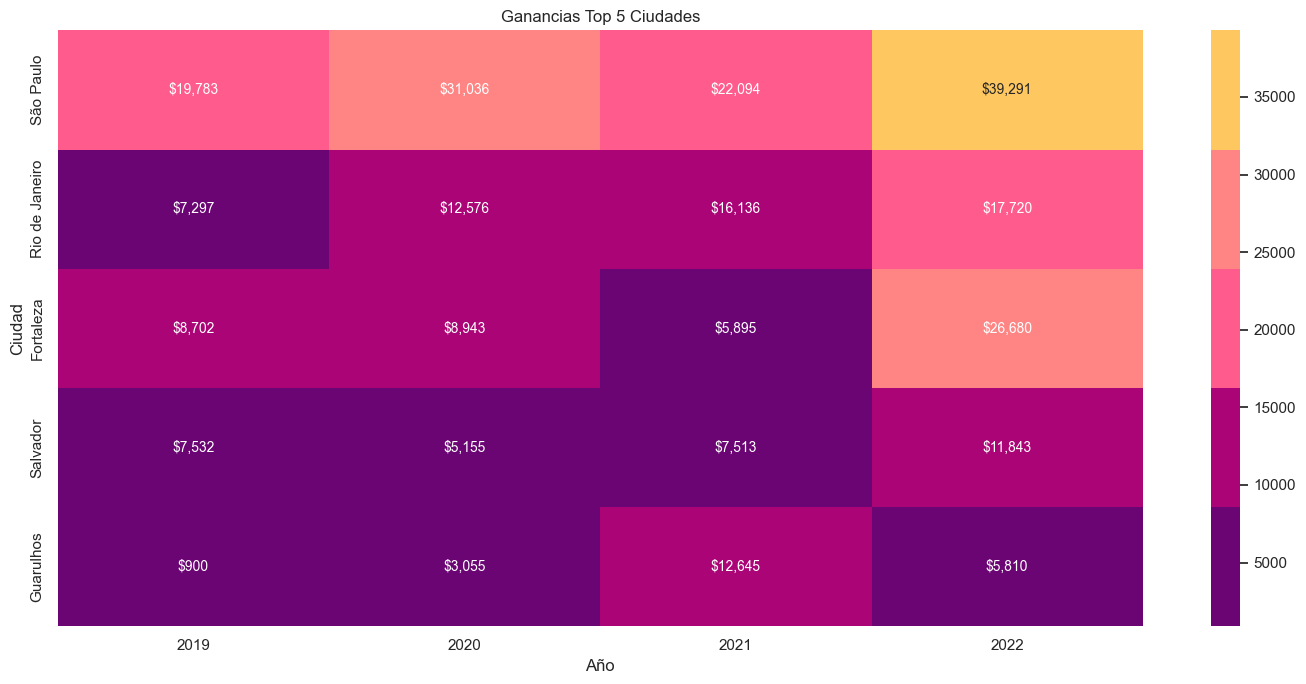

In [16]:
global ganancias_ciudad_año

#
colores = ['#6a0573', '#ab0476', '#ff5c8d', '#ff8484', '#ffc75f']

# Agrupar por ciudad y año
ganancias_ciudad_año = df_ventas_limpio.groupby(['ciudad', df_ventas_limpio['fecha_pedido'].dt.year]).agg({'total_ganancia':'sum'}).reset_index()

heatmap_data = ganancias_ciudad_año.pivot(index='ciudad', columns='fecha_pedido', values='total_ganancia').fillna(0)

# Seleccionar las top 5 ciudades por ganancia total para una mejor visualización
ganancias_por_ciudad = df_ventas_limpio.groupby('ciudad').agg({'total_ganancia':'sum'}).reset_index()
top_5_ciudades = ganancias_por_ciudad.nlargest(5, 'total_ganancia')['ciudad']
heatmap_data_top_5 = heatmap_data.loc[top_5_ciudades]

annot_matrix = heatmap_data_top_5.applymap(lambda x: "${:,.0f}".format(x))

# Crear heatmap
sns.set(style="white")
plt.figure(figsize=(16, 7))  # Ajuste en el tamaño para acomodar el texto

sns.heatmap(heatmap_data_top_5, cmap=sns.color_palette(colores), annot=annot_matrix, fmt="", annot_kws={'size': 10})
plt.title('Ganancias Top 5 Ciudades')
plt.xlabel('Año')
plt.ylabel('Ciudad')

# Añadir el texto de análisis a la derecha del heatmap
#plt.gcf().text(0.92, 0.5, analisis, ha='center', va='center', fontsize=10, wrap=True)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Ajuste para dejar espacio para el texto
plt.show()